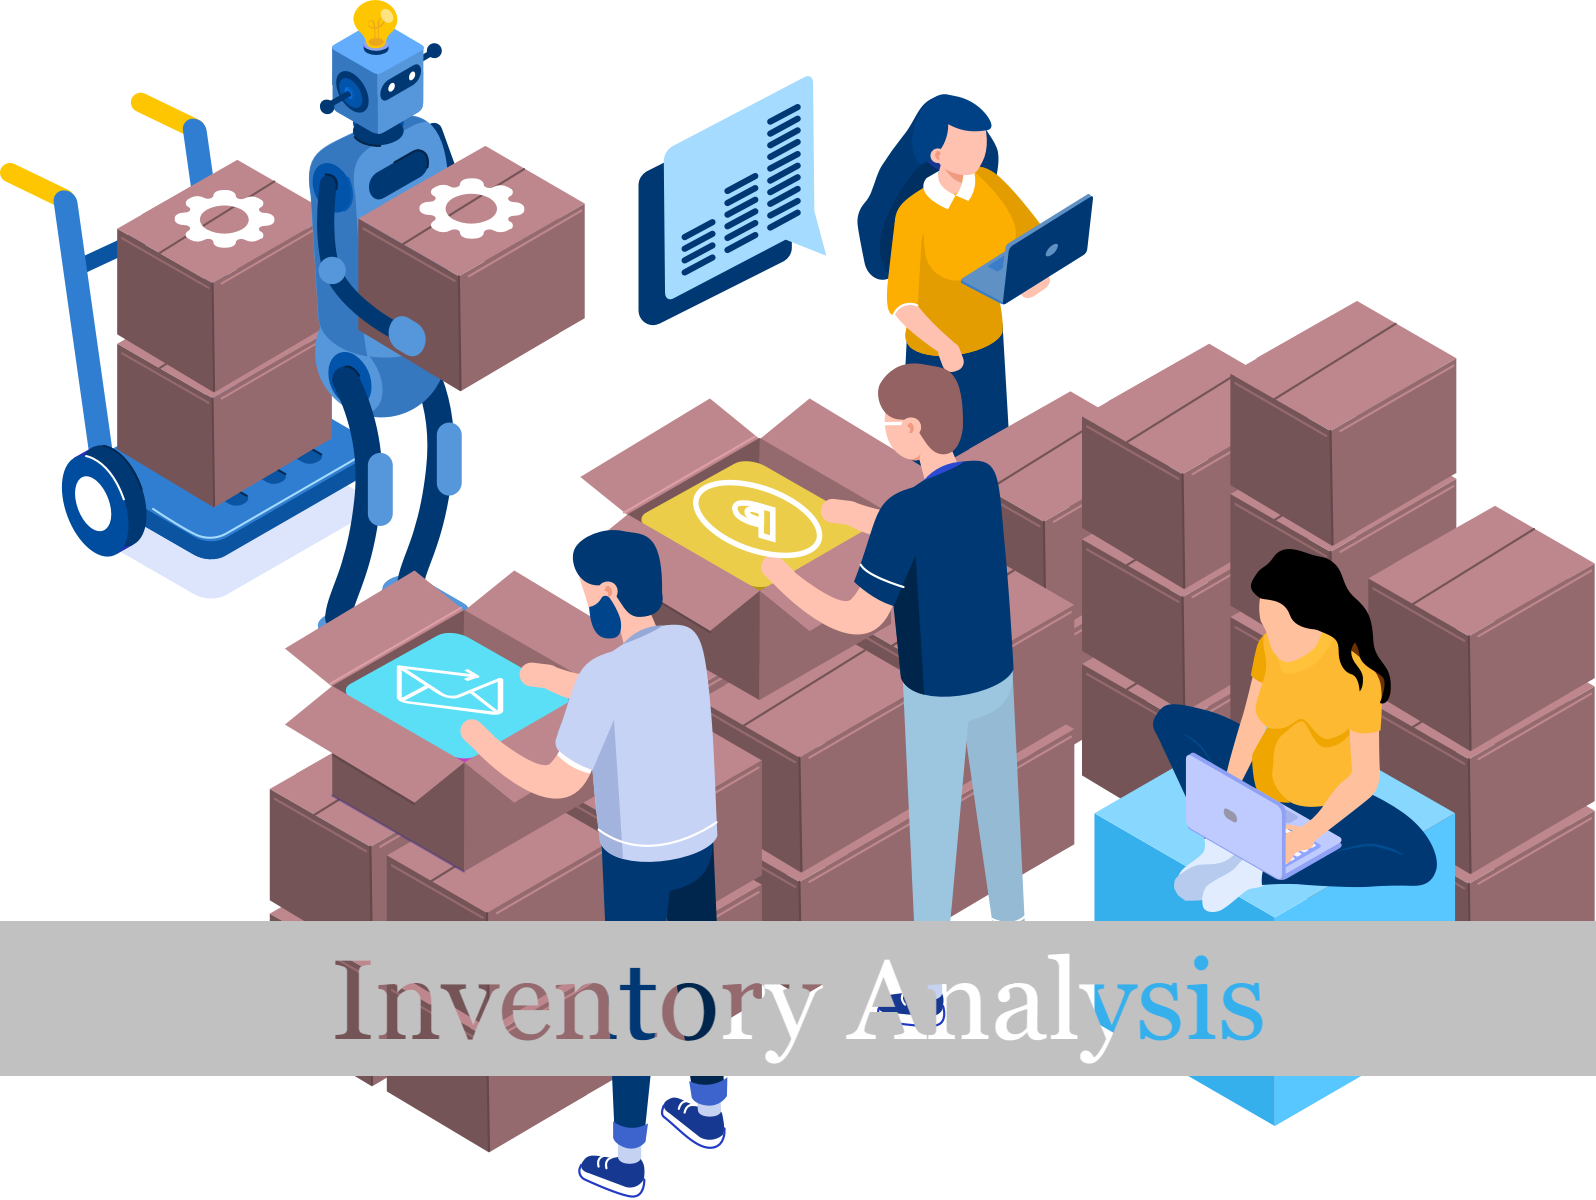

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Warnings Handling

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [3]:
PurchasePrice = pd.read_csv('2017PurchasePricesDec.csv')  #Purchase price of each product.

In [4]:
BegInv = pd.read_csv('BegInvFINAL12312016.csv')  #Beginning inventory of each product on December 31, 2016.

In [5]:
EndInv = pd.read_csv('EndInvFINAL12312016.csv')  #Ending inventory of each product on December 31, 2016.

In [6]:
Purchases = pd.read_csv('InvoicePurchases12312016.csv')  #Quantity of each product purchased in 2016.

In [7]:
PurchaseFinal = pd.read_csv('PurchasesFINAL12312016.csv')  #Total purchase value of each product in 2016.

In [8]:
SalesFinal = pd.read_csv('SalesFINAL12312016.csv')  #Total sales value of each product in 2016.

# Initial Exploration

## 1. Purchase Price Analysis

In [9]:
# Display the first few rows of the PurchasePrice DataFrame
PurchasePrice.head()  

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [10]:
# Display information about the PurchasePrice DataFrame, including data types and non-null counts
PurchasePrice.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB


In [11]:
# Generate descriptive statistics for the columns in the PurchasePrice DataFrame
PurchasePrice.describe().T  

,count,mean,std,min,25%,50%,75%,max
Brand,12261.0,17989.067123,12528.503464,58.0,5990.00,18788.00,25117.00,90631.00
Price,12261.0,38.640240,206.151172,0.0,10.99,15.99,29.99,13999.90
Classification,12261.0,1.708996,0.454244,1.0,1.00,2.00,2.00,2.00
PurchasePrice,12261.0,26.488220,156.182948,0.0,6.89,10.65,20.13,11111.03
VendorNumber,12261.0,10814.861757,19007.682322,2.0,3960.00,7153.00,9552.00,173357.00


In [12]:
# Display the shape number of rows and columns of the PurchasePrice DataFrame
PurchasePrice.shape  

(12261, 9)

In [13]:
# Count the number of null values in each column of the PurchasePrice DataFrame
PurchasePrice.isnull().sum()  

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [14]:
# Checking the null values in the 'Description' column
PurchasePrice[PurchasePrice['Description'].isnull()]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.0,NaN,NaN,1,11.19,480,BACARDI USA INC


In [15]:
# Dropping the null values in the PurchasePrice DataFrame
PurchasePrice.dropna(inplace=True)

In [16]:
# Calculate the correlation between numeric columns in the PurchasePrice DataFrame
PurchasePrice.corr()  

,Brand,Price,Classification,PurchasePrice,VendorNumber
Brand,1.000000,-0.035824,0.733686,-0.043301,0.062648
Price,-0.035824,1.000000,-0.047130,0.997658,-0.014470
Classification,0.733686,-0.047130,1.000000,-0.056458,0.093307
PurchasePrice,-0.043301,0.997658,-0.056458,1.000000,-0.014135
VendorNumber,0.062648,-0.014470,0.093307,-0.014135,1.000000


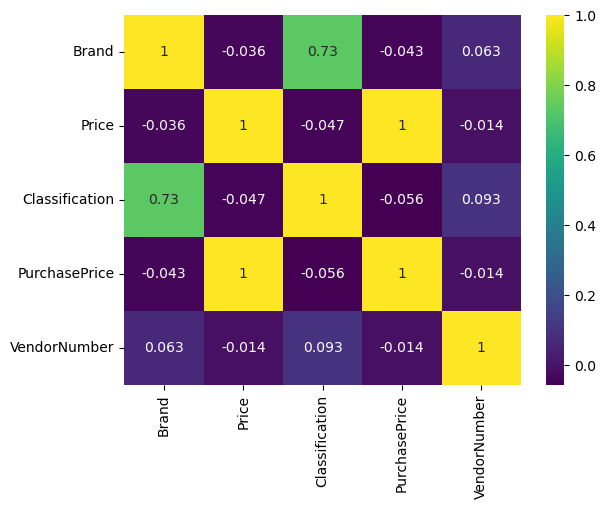

In [17]:
# Create a heatmap to visualize the correlation matrix using Seaborn
sns.heatmap(PurchasePrice.corr(), cmap='viridis', annot=True)
plt.show()

## 2. Beginning Inventory Analysis

In [18]:
# Display the first few rows of the DataFrame "BegInv"
BegInv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [19]:
# Display information about the DataFrame "BegInv," including data types and non-null counts
BegInv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [20]:
# Generate descriptive statistics for the DataFrame "BegInv" and transpose the result for readability
BegInv.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,206529.0,42.122457,23.191393,1.0,22.00,42.00,64.00,79.0
Brand,206529.0,13761.482320,13059.429355,58.0,3746.00,8010.00,22143.00,90090.0
onHand,206529.0,20.429455,31.467342,0.0,7.00,12.00,21.00,1251.0
Price,206529.0,22.253910,70.178964,0.0,9.99,14.99,21.99,13999.9


In [21]:
# Get the shape (number of rows and columns) of the DataFrame "BegInv"
BegInv.shape

(206529, 9)

In [22]:
# Calculate the number of missing (null) values in each column of the DataFrame "BegInv"
BegInv.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [23]:
# Calculate the correlation matrix for the numeric columns in the 'BegInv' DataFrame.
BegInv.corr()

,Store,Brand,onHand,Price
Store,1.000000,0.039331,0.077987,0.030347
Brand,0.039331,1.000000,-0.033851,-0.042091
onHand,0.077987,-0.033851,1.000000,-0.056660
Price,0.030347,-0.042091,-0.056660,1.000000


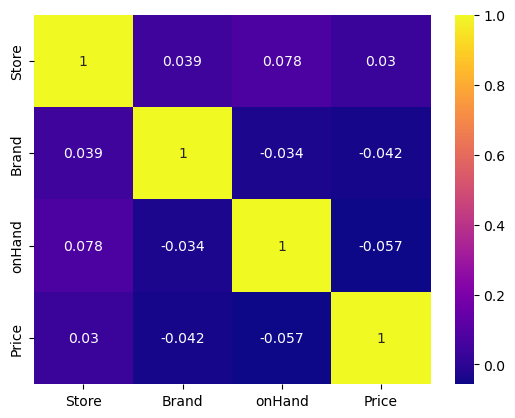

In [24]:
# Create a heatmap visualization of the correlation matrix, using Seaborn
sns.heatmap(BegInv.corr(), cmap='plasma', annot=True)
plt.show()

## 3. Ending Inventory Analysis 

In [25]:
# Display the first few rows of the 'EndInv' DataFrame to inspect the data.
EndInv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [26]:
# Display information about the 'EndInv' DataFrame, including data types and non-null values.
EndInv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [27]:
# Generate a summary of descriptive statistics for the 'EndInv' DataFrame.
EndInv.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,224489.0,43.505740,23.326415,1.00,23.00,44.00,66.00,81.0
Brand,224489.0,14356.370513,13118.467851,58.00,3798.00,8259.00,23965.00,90631.0
onHand,224489.0,21.763988,37.233576,0.00,7.00,12.00,22.00,3676.0
Price,224489.0,23.585583,79.202775,0.49,9.99,14.99,23.49,13999.9


In [28]:
# Get the shape of the 'EndInv' DataFrame, which returns the number of rows and columns.
EndInv.shape

(224489, 9)

In [29]:
# Check for missing (NaN) values in the 'EndInv' DataFrame and display the count of missing values for each column.
EndInv.isnull().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [30]:
# Create a new DataFrame by dropping the 'City' column from 'EndInv' and display the first few rows.
EndInv.drop('City', axis=1).head()

,InventoryId,Store,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [31]:
# Compute the correlation matrix for the 'EndInv' DataFrame, which shows the pairwise correlations between numerical columns.
EndInv.corr()

,Store,Brand,onHand,Price
Store,1.000000,0.050018,0.054414,0.031032
Brand,0.050018,1.000000,-0.059422,-0.042231
onHand,0.054414,-0.059422,1.000000,-0.053668
Price,0.031032,-0.042231,-0.053668,1.000000


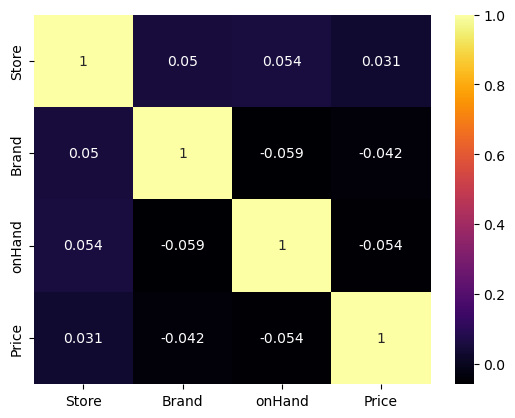

In [32]:
# Create a heatmap of the correlation matrix for 'EndInv' using Seaborn.
sns.heatmap(EndInv.corr(), cmap='inferno', annot=True)
plt.show()

## 4. Purchases Analysis 

In [33]:
# Create a new column 'Total Amount' by summing 'Dollars' and 'Freight' columns
Purchases['Total Amount'] = Purchases['Dollars'] + Purchases['Freight']

# Display the first few rows of the DataFrame to inspect the changes
Purchases.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,Total Amount
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None,217.73
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,None,149.12
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,None,111.21
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,None,140418.98
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,None,15956.45


In [34]:
# Print information about the DataFrame including data types and non-null counts
Purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      5543 non-null   object 
 10  Total Amount  5543 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 476.5+ KB


In [35]:
# Generate summary statistics (mean, std, min, max, etc.) for each numerical column
Purchases.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,5543.0,20662.752120,34582.158410,2.00,3089.00,7240.00,10754.000,201359.00
PONumber,5543.0,10889.419087,1600.859969,8106.00,9503.50,10890.00,12275.500,13661.00
Quantity,5543.0,6058.880931,14453.338164,1.00,83.00,423.00,5100.500,141660.00
Dollars,5543.0,58073.383642,140234.031377,4.14,967.81,4765.45,44587.175,1660435.88
Freight,5543.0,295.954301,713.585093,0.02,5.02,24.73,229.660,8468.22
Total Amount,5543.0,58369.337943,140937.066515,4.16,972.41,4790.71,44794.505,1668904.10


In [36]:
# Retrieve the shape of the DataFrame, showing the number of rows and columns
Purchases.shape

(5543, 11)

In [37]:
# Check for missing values in each column and sum them up
Purchases.isnull().sum()

VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
Total Amount    0
dtype: int64

In [38]:
# Calculate and display the correlation matrix for the columns in the 'Purchases' DataFrame.
Purchases.corr()

,VendorNumber,PONumber,Quantity,Dollars,Freight,Total Amount
VendorNumber,1.000000,0.014151,-0.168329,-0.163386,-0.163493,-0.163398
PONumber,0.014151,1.000000,0.049230,0.058917,0.043617,0.058844
Quantity,-0.168329,0.049230,1.000000,0.963831,0.946550,0.963815
Dollars,-0.163386,0.058917,0.963831,1.000000,0.985141,1.000000
Freight,-0.163493,0.043617,0.946550,0.985141,1.000000,0.985290
Total Amount,-0.163398,0.058844,0.963815,1.000000,0.985290,1.000000


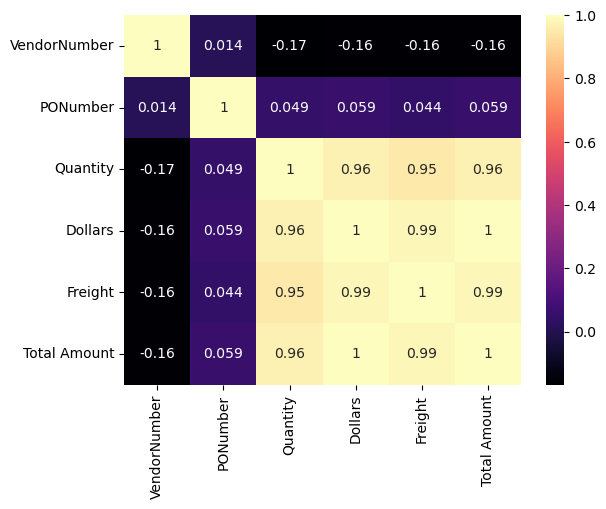

In [39]:
# Create a heatmap to visualize the correlations between different columns in the 'Purchases' DataFrame.
sns.heatmap(Purchases.corr(), cmap='magma', annot=True)
plt.show()

## 5. Final Purchases Analysis 

In [40]:
# Display the first few rows of the DataFrame "PurchaseFinal"
PurchaseFinal.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [41]:
# Display information about the DataFrame, including data types and non-null values
PurchaseFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB


In [42]:
# Display summary statistics (mean, min, max, etc.) for the columns in the DataFrame
PurchaseFinal.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,2372474.0,44.651328,23.512448,1.0,25.00,48.00,67.00,81.00
Brand,2372474.0,12418.641110,12557.278331,58.0,3639.00,6523.00,18877.00,90631.00
VendorNumber,2372474.0,6886.435533,8066.693891,2.0,3252.00,4425.00,9552.00,201359.00
PONumber,2372474.0,11040.936647,1565.340220,8106.0,9761.00,11103.00,12397.00,13661.00
PurchasePrice,2372474.0,12.050050,17.945104,0.0,6.12,9.22,14.49,5681.81
Quantity,2372474.0,14.155846,23.446162,1.0,6.00,10.00,12.00,3816.00
Dollars,2372474.0,135.681472,281.664941,0.0,49.26,83.93,140.52,50175.70
Classification,2372474.0,1.443520,0.496800,1.0,1.00,1.00,2.00,2.00


In [43]:
# Get the shape number of rows and columns of the DataFrame
PurchaseFinal.shape

(2372474, 16)

In [44]:
# Count the number of missing null values in each column of the DataFrame
PurchaseFinal.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64

In [45]:
# Select rows in the DataFrame where the 'Size' column is null (missing values)
PurchaseFinal[PurchaseFinal['Size'].isnull()]

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
1109668,34_PITMERDEN_3121,34,3121,Pinnacle Rainbow Sherbet,NaN,12546,JIM BEAM BRANDS COMPANY,10938,2016-06-27,2016-07-04,2016-07-13,2016-08-16,6.93,7,48.51,1
1112426,34_PITMERDEN_5678,34,5678,Skinnygirl Pina Colada,NaN,12546,JIM BEAM BRANDS COMPANY,10938,2016-06-27,2016-07-09,2016-07-13,2016-08-16,6.93,6,41.58,1
1116302,39_EASTHALLOW_15365,39,15365,Alabaster 07 Tinta de Toro,NaN,9552,M S WALKER INC,10972,2016-06-29,2016-07-07,2016-07-13,2016-08-21,91.83,1,91.83,2


In [46]:
# Remove rows with missing values (NaN) from the DataFrame in-place
PurchaseFinal.dropna(inplace=True)

In [47]:
# Calculate the correlation between columns in the DataFrame
PurchaseFinal.corr()

,Store,Brand,VendorNumber,PONumber,PurchasePrice,Quantity,Dollars,Classification
Store,1.000000,0.034565,0.008087,0.017260,0.025590,0.004462,0.025745,0.038144
Brand,0.034565,1.000000,-0.003224,0.007495,-0.145681,-0.035341,-0.085899,0.739753
VendorNumber,0.008087,-0.003224,1.000000,-0.004309,0.022472,-0.008045,0.008047,-0.031739
PONumber,0.017260,0.007495,-0.004309,1.000000,0.012961,0.014371,0.023810,0.011513
PurchasePrice,0.025590,-0.145681,0.022472,0.012961,1.000000,-0.082941,0.211512,-0.190782
Quantity,0.004462,-0.035341,-0.008045,0.014371,-0.082941,1.000000,0.596737,-0.055789
Dollars,0.025745,-0.085899,0.008047,0.023810,0.211512,0.596737,1.000000,-0.113963
Classification,0.038144,0.739753,-0.031739,0.011513,-0.190782,-0.055789,-0.113963,1.000000


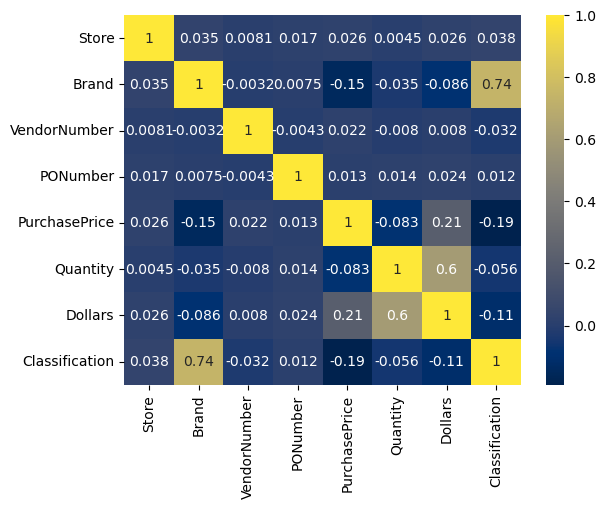

In [48]:
# Create a heatmap of the correlation matrix with Seaborn
sns.heatmap(PurchaseFinal.corr(), cmap='cividis', annot=True)
plt.show()

## 6. Final Sales Analysis

In [49]:
# Calculate the 'Total Amount' column by adding 'SalesDollars' and 'ExciseTax' columns
SalesFinal['Total Amount'] = SalesFinal['SalesDollars'] + SalesFinal['ExciseTax']

# Display the first few rows of the DataFrame 'SalesFinal'
SalesFinal.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,Total Amount
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,34.55
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,15.28
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,70.77


In [50]:
# Display information about the DataFrame, including data types and non-null values
SalesFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
 14  Total Amount    1048575 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 120.0+ MB


In [51]:
# Generate summary statistics for the DataFrame, transposed for better readability
SalesFinal.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1048575.0,40.080632,24.357388,1.00,15.00,39.00,64.00,79.00
Brand,1048575.0,12169.585281,12419.213625,58.00,3680.00,6296.00,17954.00,90089.00
SalesQuantity,1048575.0,2.337619,3.511492,1.00,1.00,1.00,2.00,432.00
SalesDollars,1048575.0,31.604201,65.702486,0.49,10.99,17.99,31.99,13279.97
SalesPrice,1048575.0,15.431622,14.049674,0.49,8.99,12.99,18.99,4999.99
Volume,1048575.0,950.028027,714.270774,50.00,750.00,750.00,1500.00,20000.00
Classification,1048575.0,1.416550,0.492987,1.00,1.00,1.00,2.00,2.00
ExciseTax,1048575.0,1.326847,3.407898,0.01,0.16,0.68,1.57,378.52
VendorNo,1048575.0,6995.043206,8426.735714,2.00,3252.00,4425.00,9552.00,173357.00
Total Amount,1048575.0,32.931048,68.039280,0.54,11.21,18.78,33.65,13308.43


In [52]:
# Get the shape of the DataFrame, which is a tuple (number of rows, number of columns)
SalesFinal.shape

(1048575, 15)

In [53]:
# Check and display the count of missing (null) values in each column of the DataFrame
SalesFinal.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
Total Amount      0
dtype: int64

In [54]:
# Calculate and display the correlation matrix for the DataFrame
SalesFinal.corr()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo,Total Amount
Store,1.000000,0.047706,0.011389,0.033255,0.040185,-0.025336,0.055353,-0.006639,0.005976,0.031780
Brand,0.047706,1.000000,-0.021921,-0.034501,-0.105634,0.037205,0.752780,-0.196474,0.017025,-0.043157
SalesQuantity,0.011389,-0.021921,1.000000,0.625535,-0.090585,-0.068905,-0.022889,0.545453,-0.023879,0.631371
SalesDollars,0.033255,-0.034501,0.625535,1.000000,0.338587,0.109596,-0.035793,0.671959,-0.006421,0.999312
SalesPrice,0.040185,-0.105634,-0.090585,0.338587,1.000000,0.213181,-0.129853,0.115501,0.018239,0.332743
Volume,-0.025336,0.037205,-0.068905,0.109596,0.213181,1.000000,0.105639,0.240154,-0.006242,0.117861
Classification,0.055353,0.752780,-0.022889,-0.035793,-0.129853,0.105639,1.000000,-0.247878,-0.000348,-0.046979
ExciseTax,-0.006639,-0.196474,0.545453,0.671959,0.115501,0.240154,-0.247878,1.000000,-0.006275,0.698968
VendorNo,0.005976,0.017025,-0.023879,-0.006421,0.018239,-0.006242,-0.000348,-0.006275,1.000000,-0.006515
Total Amount,0.031780,-0.043157,0.631371,0.999312,0.332743,0.117861,-0.046979,0.698968,-0.006515,1.000000


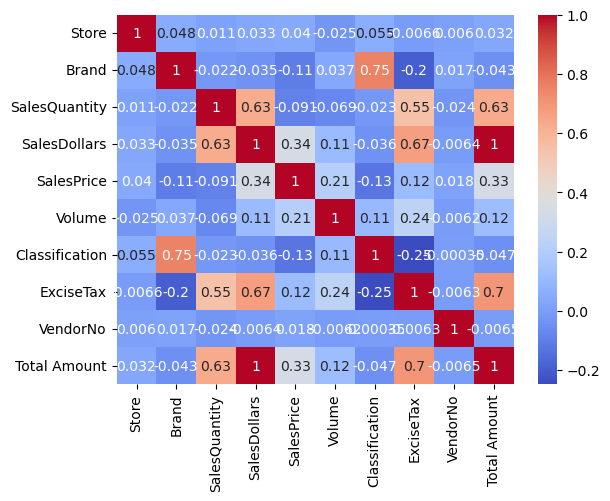

In [55]:
# Create a heatmap of the correlation matrix with Seaborn
sns.heatmap(SalesFinal.corr(), cmap='coolwarm', annot=True)
plt.show()

# Exploratory Data Analysis

## 1. Word Cloud Analysis

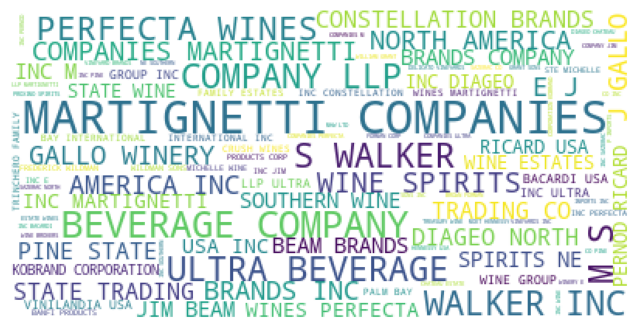

In [56]:
# Extract the VendorName column and concatenate all the values into a single string
text = ' '.join(PurchasePrice['VendorName'].astype(str).tolist())

# Create a WordCloud object and customize it
wordcloud = WordCloud(background_color='white', max_font_size=50, stopwords=STOPWORDS).generate(text)

# Set the figure size to 10 inches by 8 inches
plt.figure(figsize=(8, 6))

# Generate and display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The output of the code is a visual representation of the most common vendor names in the PurchasePrice DataFrame, with the size of each word indicating its frequency.

## 2. Top Brands by Price

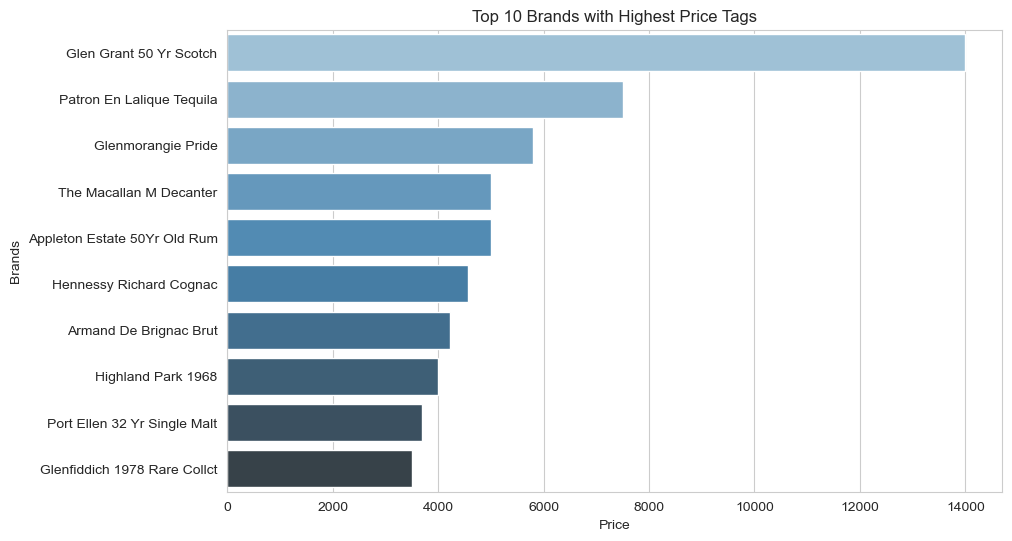

In [57]:
# Get the top 10 brands with the highest price tags
vc = PurchasePrice.groupby(['Description'])['Price'].max().sort_values(ascending=False)[:10]

# Create a horizontal bar plot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=vc.values, y=vc.index, palette='Blues_d')

# Set the title and axis labels
plt.title('Top 10 Brands with Highest Price Tags')
plt.xlabel('Price')
plt.ylabel('Brands')

# Show the plot
plt.show()

The output is horizontal bar plot showing the top 10 brands with the highest price tags.

## 3. Vendor vs. Quantity Analysis

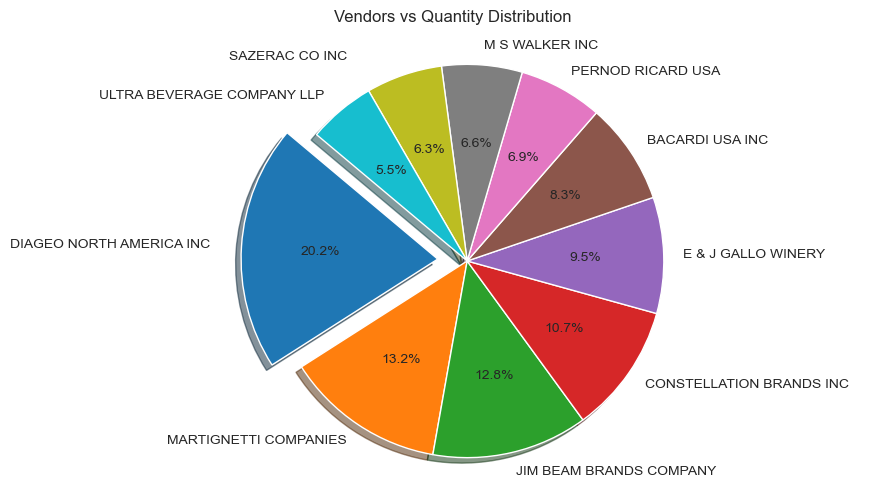

In [58]:
# Calculate the top 10 vendors and their quantities
top_vendors = Purchases.groupby(['VendorName'])['Quantity'].max().sort_values(ascending=False)[:10]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_vendors,labels=top_vendors.index,autopct='%1.1f%%',startangle=140,explode=(0.15,0,0,0,0,0,0,0,0,0),shadow=True)

# Set the title for the pie chart
plt.title('Vendors vs Quantity Distribution')

# Ensure an equal aspect ratio for a circular pie chart
plt.axis('equal')

# Display the pie chart
plt.show()

The output is pie chart will be a visual representation of the top 10 vendors and their quantities, which can be used to identify the most important vendors to the business.

## 4. Total Amount Distribution for Top Vendors

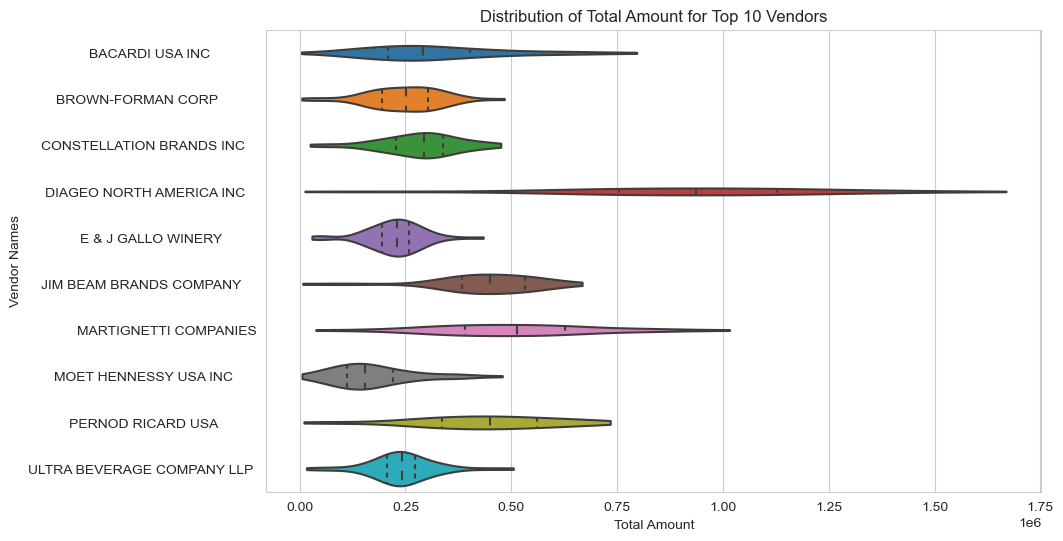

In [59]:
# Create a new figure with a specified size 
plt.figure(figsize=(10, 6))

# Group the data by 'VendorName,' find the maximum 'Total Amount' for each vendor, 
# sort them in descending order, and select the top 10 vendors.
top_vendors = Purchases.groupby(['VendorName'])['Total Amount'].max().sort_values(ascending=False).index[:10]

# Create a violin plot to visualize the distribution of 'Total Amount' for the top vendors.
sns.violinplot(x='Total Amount',y='VendorName',data=Purchases[Purchases['VendorName'].isin(top_vendors)],inner="quart",cut=0)

# Set the title for the plot
plt.title('Distribution of Total Amount for Top 10 Vendors')

# Label the x-axis
plt.xlabel('Total Amount')

# Label the y-axis
plt.ylabel('Vendor Names')

# Display the plot
plt.show()

The output is violin plot to visualize the distribution of Total Amount for the top 10 vendors, sorted by maximum Total Amount.

## 5. Top Brands by Purchase Price

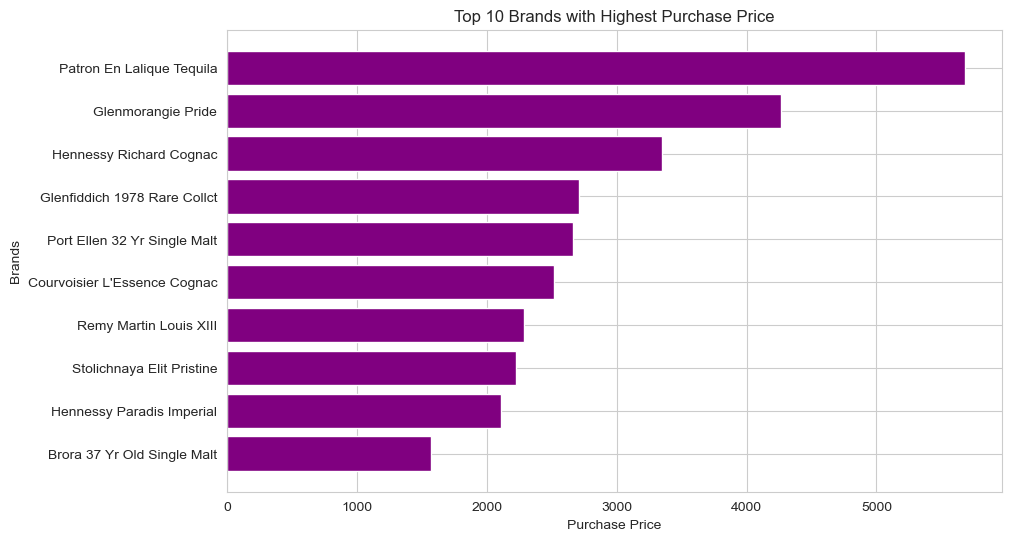

In [60]:
# Sort the data
vc = PurchaseFinal.groupby(['Description'])['PurchasePrice'].max().sort_values(ascending=False)[:10]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(vc.index, vc.values, color='purple')

# Add title and labels
plt.title('Top 10 Brands with Highest Purchase Price')  
plt.xlabel('Purchase Price')  
plt.ylabel('Brands')  

# Invert the y-axis to display the highest value at the top
plt.gca().invert_yaxis()

# Display the plot
plt.show()

The output is horizontal bar chart showing the top 10 brands with the highest purchase price.

## 6. Top Vendors by Sales Amount 

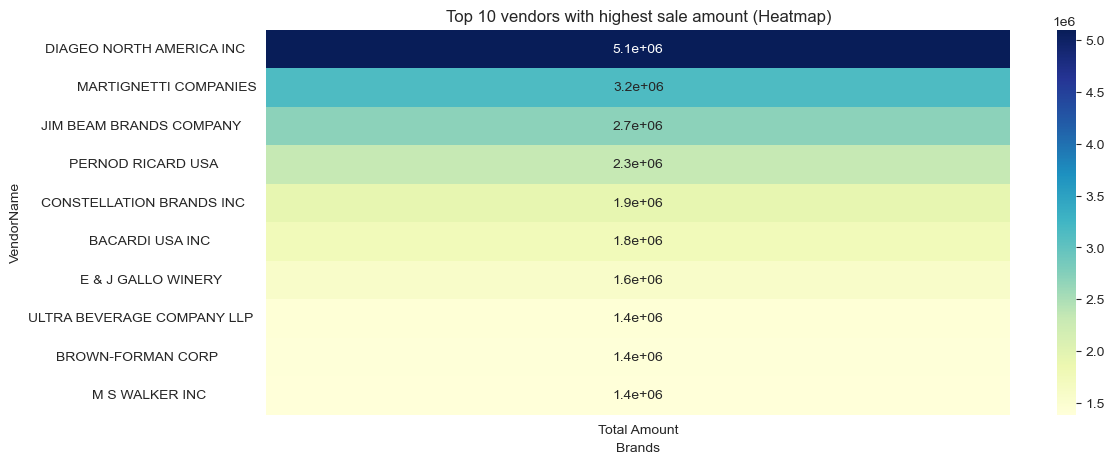

In [61]:
# First, it creates a pivot table of the SalesFinal DataFrame
pivot_table = SalesFinal.pivot_table(index='VendorName', values='Total Amount', aggfunc='sum')

# Next, the pivot table is sorted by total sales amount in descending order
pivot_table = pivot_table.sort_values(by='Total Amount', ascending=False)[:10]

# Then, a heatmap of the pivot table is created
plt.figure(figsize=(12, 5))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')

# Finally, the heatmap is titled and labeled
plt.title('Top 10 vendors with highest sale amount (Heatmap)')
plt.xlabel('Brands')

# Show the plot
plt.show()

The output is heatmap of the top 10 vendors with the highest sales amount.

## 7. Top Brands by Sale Amount

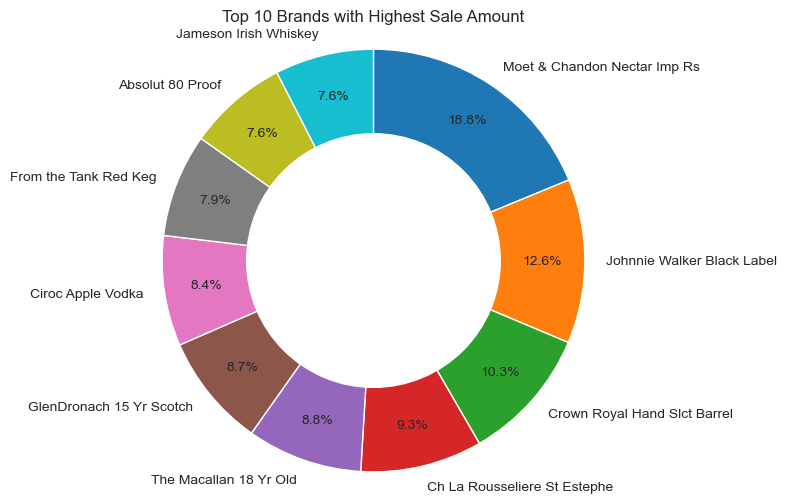

In [62]:
# Get the top 10 brands with the highest sale amount
vc = SalesFinal.groupby(['Description'])['Total Amount'].max().sort_values(ascending=False)[:10]

# Create a figure and axis
plt.figure(figsize=(6,6))
ax = plt.gca()

# Create a donut chart
wedges, texts, autotexts = ax.pie(vc.values, labels=vc.index, autopct='%1.1f%%', pctdistance=0.80, startangle=90, counterclock=False)

# Create a white circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.60, fc='white')
ax.add_artist(center_circle)

# Set aspect ratio to equal to ensure a circular chart
ax.axis('equal')

# Add a title
plt.title('Top 10 Brands with Highest Sale Amount')

# Show the plot
plt.show()

The output is a donut chart showing the top 10 brands with the highest sale amount